In [22]:
#Importing Libraries
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# loading mnist data
(X_train,y_train), (X_test,y_test) = mnist.load_data()


In [3]:
# feature scaling and normalization
training_images = X_train.reshape((60000, 28 , 28,1)).astype('float32') / 255
training_targets = to_categorical(y_train)
test_images = X_test.reshape((10000, 28 , 28,1)).astype('float32') / 255
test_targets = to_categorical(y_test)
input_shape = (training_images.shape[1],)


In [11]:
# building the model
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
#model.add(MaxPooling2D((2,2)))
#model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
#model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))





In [12]:
#Compiling model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Fitting Model to training data
history = model.fit(training_images, training_targets, validation_split=0.3, epochs=50)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 13s 312us/sample - loss: 0.1976 - acc: 0.9410 - val_loss: 0.1071 - val_acc: 0.9669
Epoch 2/50
42000/42000 [==============================] - 13s 305us/sample - loss: 0.0677 - acc: 0.9790 - val_loss: 0.0701 - val_acc: 0.9787
Epoch 3/50
42000/42000 [==============================] - 13s 308us/sample - loss: 0.0461 - acc: 0.9859 - val_loss: 0.0601 - val_acc: 0.9822
Epoch 4/50
42000/42000 [==============================] - 14s 326us/sample - loss: 0.0328 - acc: 0.9898 - val_loss: 0.0763 - val_acc: 0.9789
Epoch 5/50
42000/42000 [==============================] - 14s 335us/sample - loss: 0.0234 - acc: 0.9929 - val_loss: 0.0551 - val_acc: 0.9840
Epoch 6/50
42000/42000 [==============================] - 14s 326us/sample - loss: 0.0167 - acc: 0.9949 - val_loss: 0.0620 - val_acc: 0.9821
Epoch 7/50
42000/42000 [==============================] - 14s 322us/sample - loss: 0.0107 - acc: 0.9970 

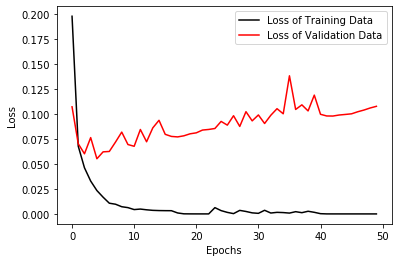

In [21]:
#Plotting the graph for train loss and validation loss
plt.plot(history.history['loss'], 'k-', label = 'Loss of Training Data')
plt.plot(history.history['val_loss'], 'r-', label = 'Loss of Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()